<span style="color:purple">

## ■ AI topic 중 "pose estimation" 관련 논문 scraping 및 hot topic 분석
    
</span>

#### Google Scholar 를 통한 논문 검색

- AI 는 최신 기술, 최신 연구 내용이 중요하고 계속 새로운 SOTA(state-of-the-art) 알고리즘이 나오고 있기 때문에 follow-up 해가며 update 해주는 것이 중요하다.
- 중복 연구를 피하면서 현재 연구에 도움이 되는 유의미한 논문을 찾아야 한다.
- 따라서 많은 수로 인용된 논문들을 선별하여 우수 논문을 찾고, 우수 논문들이 다루는 topic 에 대해 알아본다.
- 연도별로 논문을 분류해 pose estimation 관련하여 어떤 연도에 가장 연구가 활발히 이루어졌는지 알아본다.


- 영어 논문이기 때문에 nltk 의 Penn Treebank Tagset 을 사용하여 POS Tagging 을 진행한다.
- 논문은 네이버, 다음, 구글보다 google scholar 를 통해 더 질 좋은 검색을 할 수 있다.

In [2]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import re

import warnings
warnings.filterwarnings('ignore')


## (1) 논문 검색
###  ■ 구글 scholar 검색창에서 'pose estimation'  입력
#### 필요한 부분을 정규표현식을 사용하여 추출



In [3]:
url ='https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=pose+estimation&btnG='
req = requests.get(url)    # 해당 페이지를 가져옴
page = BeautifulSoup(req.text , 'html.parser')

### ▶ 논문 제목 추출

In [4]:
titles = page.find_all(attrs='gs_rt')

###### 검색된 title의 크기를 확인한다.

In [5]:
print(len(titles))

10


###### 검색된 title을 각각 프린트 한다.

In [6]:
for title in titles :
    print(title.text)
    print()

Pose estimation from corresponding point data

Deeppose: Human pose estimation via deep neural networks

Stacked hourglass networks for human pose estimation

Head pose estimation in computer vision: A survey

Rmpe: Regional multi-person pose estimation

Fast pose estimation with parameter-sensitive hashing

Linear pose estimation from points or lines

Articulated pose estimation with flexible mixtures-of-parts

Realtime multi-person 2d pose estimation using part affinity fields

3d human pose estimation= 2d pose estimation+ matching



### ▶ 논문 인용횟수 추출
- 정규표현식을 이용해 논문 인용횟수를 추출한다.

In [7]:
cite = page.select('div.gs_fl')
num = re.compile("[0-9]+")
cite_final = []

for n in cite:
    if num.search(n.get_text()) :
        cite_final.append(num.search(n.get_text()).group())
        
print(cite_final)

['899', '2028', '2765', '1551', '622', '1009', '511', '1342', '3605', '318']


### ▶ 논문 저자 추출
- 정규표현식을 이용해 논문 저자를 추출한다.

In [8]:
author = page.select('div.gs_a')

first = re.compile(r"\w*\s*\w+")
author_final = []

for a in author:
    if first.search(a.get_text()) :
        author_final.append(first.search(a.get_text()).group())

print(author_final)

['RM Haralick', 'A Toshev', 'A Newell', 'E Murphy', 'HS Fang', 'G Shakhnarovich', 'A Ansar', 'Y Yang', 'Z Cao', 'CH Chen']


### ▶ 논문 작성연도 추출
- 정규표현식을 이용해 논문 작성연도를 추출한다.

In [9]:
year = page.select('div.gs_a')

yr = re.compile('\d\d\d\d')
year_final = []

for y in year:
    if yr.search(y.get_text()) :
        year_final.append(yr.search(y.get_text()).group())
        
print(year_final)

['1989', '2014', '2016', '2008', '2017', '2003', '2003', '2011', '2017', '2017']


## (2) 스크래핑


##### ▶ 첫 페이지부터 원하는 페이지 까지 스크래핑하는 함수 정의

In [10]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 


title_list = []
cite_list = []
author_list = []
year_list = []

def web_scraping(keyword, end, start = 0):    # 시작 페이지의 default 값은 0(즉, 첫 페이지 부터 시작) 
    while 1:

        if start > (end-1) * 10 :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break 
        
        url ='https://scholar.google.com/scholar?start={}&q={}'.format(start,keyword)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.find_all(attrs='gs_rt')     # 헤드라인 기사를 가져옴     
        for one in titles:
            title_list.append(one.text)
        
        cite = page.select('div.gs_fl')
        num = re.compile("[0-9]+")
        for n in cite:
            if num.search(n.get_text()) :
                cite_list.append(num.search(n.get_text()).group())
                
        author = page.select('div.gs_a')
        first = re.compile(r"\w*\s*\w+")
        for a in author:
            if first.search(a.get_text()) :
                author_list.append(first.search(a.get_text()).group())
                
        year = page.select('div.gs_a')
        yr = re.compile('\d\d\d\d')
        for y in year:
            if yr.search(y.get_text()) :
                year_list.append(yr.search(y.get_text()).group())

        start += 10
    
    print(title_list)
    print(cite_list)
    print(author_list)
    print(year_list)

### ▶ 위 함수를 호출

In [12]:
# 검색어를 입력 받음 
keyword = input('검색어를 입력하세요 : ')
print()

end_page = int(input('스크래핑할 마지막 페이지를 입력하세요 : '))

web_scraping(keyword, end_page)       #  end 페이지 까지 스크래핑을 해온다.


검색어를 입력하세요 : pose estimation

스크래핑할 마지막 페이지를 입력하세요 : 5
['Pose estimation from corresponding point data', 'Deeppose: Human pose estimation via deep neural networks', 'Stacked hourglass networks for human pose estimation', 'Head pose estimation in computer vision: A survey', 'Rmpe: Regional multi-person pose estimation', 'Fast pose estimation with parameter-sensitive hashing', 'Linear pose estimation from points or lines', 'Articulated pose estimation with flexible mixtures-of-parts', 'Realtime multi-person 2d pose estimation using part affinity fields', '3d human pose estimation= 2d pose estimation+ matching', '2d human pose estimation: New benchmark and state of the art analysis', 'Vision-based hand pose estimation: A review', 'A simple yet effective baseline for 3d human pose estimation', 'Multiposenet: Fast multi-person pose estimation using pose residual network', 'Robust pose estimation from a planar target', 'Deepercut: A deeper, stronger, and faster multi-person pose estimation m

##### 문자열인 인용횟수를 정수형 리스트로 변환

In [13]:
cite_list2 = list(map(int, cite_list))

##### 수집해 온 갯수 확인 

In [14]:
print(len(title_list))
print(len(cite_list2))
print(len(author_list))
print(len(year_list))

50
50
50
50


## (3) 논문을 dataframe 으로 정리하기


###### ▶ author, title, year, cite 를 column 으로 dataframe 을 만들어 'pose estimation' 관련 논문을 보기 좋게 표로 정리한다.
###### ▶ rank 를 이용해 인용횟수가 많은 순위대로 정렬한다.

In [15]:
data = pd.DataFrame(zip(author_list, title_list, year_list, cite_list2), columns = ['author', 'title', 'year',  'cite'])
data['rank'] = data['cite'].rank(method='min', ascending=False)
data_sorted = data.sort_values('rank')

In [16]:
data_sorted

,author,title,year,cite,rank
8,Z Cao,Realtime multi-person 2d pose estimation using...,2017,3605,1.0
2,A Newell,Stacked hourglass networks for human pose esti...,2016,2765,2.0
20,X Zhu,"Face detection, pose estimation, and landmark ...",2012,2507,3.0
1,A Toshev,Deeppose: Human pose estimation via deep neura...,2014,2028,4.0
3,E Murphy,Head pose estimation in computer vision: A survey,2008,1551,5.0
10,M Andriluka,2d human pose estimation: New benchmark and st...,2014,1424,6.0
7,Y Yang,Articulated pose estimation with flexible mixt...,2011,1342,7.0
34,Z Cao,OpenPose: realtime multi-person 2D pose estima...,2019,1313,8.0
5,G Shakhnarovich,Fast pose estimation with parameter-sensitive ...,2003,1009,9.0
35,CP Lu,Fast and globally convergent pose estimation f...,2000,997,10.0


## (4) 데이터 분석 결과 wordcloud 및 그래프 생성


## [1] 인용횟수가 많은 논문의 keyword 분석 - wordcloud 생성

In [17]:
title_cite = pd.DataFrame(zip(title_list, cite_list2), columns = ['title', 'cite'])

###### pose estimation 검색 단어 자체와 'PDF' 라는 불용어는 자체 stop words 로 설정해 keyword에서 제외

In [18]:
stopwords = ["PDF", "pose", "estimation", "Pose", "Estimation"]

for i in range(0, 50):
    word_tag = pos_tag(word_tokenize(title_cite['title'][i]))
    words = []
    for word, tag in word_tag:
        if tag in ['NN', 'NNS', 'NNP', 'NNPS'] and word not in stopwords: 
            words.append(word)
            title_cite['title'][i] = words
        else : 
            title_cite['title'][i] = "none"

# 리스트 형 문자열로 변환
for i in range(0,50) :
    t = title_cite['title'][i]
    if (t == 'none') :
        title_cite['title'][i] = 'none'
    else :
        strt = ", ".join(t)
        title_cite['title'][i] = strt

###### wordcloud 생성을 위한 기준 dictionary 생성 (해당 논문의 keyword : 인용횟수 ) 

In [19]:
dict1 = []
dict2 = []
for i in range(0,50) :
    t = title_cite['title'][i]
    c = title_cite['cite'][i]
    if (t != 'none') :
        dict1.append(t)
        dict2.append(c)

cloud_list = dict(zip(dict1, dict2))

### ▶ 결과  [인용횟수가 많은 논문의 최빈 keyword 값]
#### : DeepPose, Realtime, affinity, face detection, localization, networks

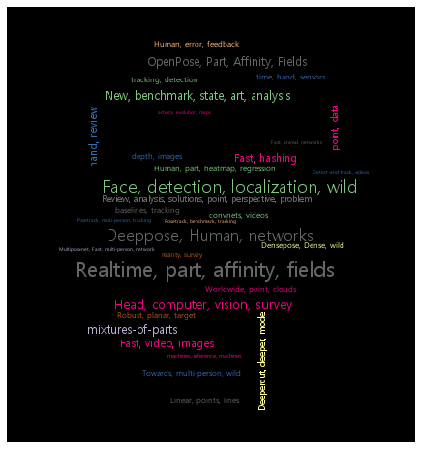

In [20]:
cloud_img = plt.imread('ai2.jpg')       # word cloud 이미지는 인공지능 이미지 사용
wordcloud2 = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600,
                      mask = cloud_img)
cloud = wordcloud2.generate_from_frequencies(cloud_list)
plt.figure(figsize=(10, 8))
plt.axis('off')   
plt.imshow(cloud)
plt.show()

## [2] 인용횟수 별 논문 작성 연도 plot

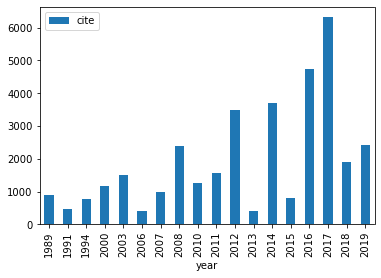

In [21]:
author_df = pd.DataFrame(zip(year_list, cite_list2), columns = ['year',  'cite'])
author_df2 = author_df.groupby('year').sum()
author_df2.plot.bar()

### ▶ 결과  [인용횟수가 가장 많았던 연도] 
#### : 2017년도에 pose estimation 관련 가장 활발한 논문 인용이 있었다.

## [3] 인용이 많이 된 상위 20개 논문을 뽑아 keyword 분석하기

In [22]:
top = data_sorted[:20]
top_title = []
for title in top['title'] :
    top_title.append(title)

#### 형태소 분석

In [23]:
sentences_tag = []

for sentence in top_title:
    word_tag = pos_tag(word_tokenize(sentence))
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('Realtime', 'NNP'), ('multi-person', 'JJ'), ('2d', 'CD'), ('pose', 'JJ'), ('estimation', 'NN'), ('using', 'VBG'), ('part', 'NN'), ('affinity', 'NN'), ('fields', 'NNS')], [('Stacked', 'JJ'), ('hourglass', 'NN'), ('networks', 'NNS'), ('for', 'IN'), ('human', 'JJ'), ('pose', 'JJ'), ('estimation', 'NN')], [('Face', 'NNP'), ('detection', 'NN'), (',', ','), ('pose', 'JJ'), ('estimation', 'NN'), (',', ','), ('and', 'CC'), ('landmark', 'JJS'), ('localization', 'NN'), ('in', 'IN'), ('the', 'DT'), ('wild', 'NN')], [('Deeppose', 'NN'), (':', ':'), ('Human', 'NNP'), ('pose', 'VBP'), ('estimation', 'NN'), ('via', 'IN'), ('deep', 'JJ'), ('neural', 'JJ'), ('networks', 'NNS')], [('Head', 'NNP'), ('pose', 'JJ'), ('estimation', 'NN'), ('in', 'IN'), ('computer', 'NN'), ('vision', 'NN'), (':', ':'), ('A', 'DT'), ('survey', 'NN')], [('2d', 'CD'), ('human', 'JJ'), ('pose', 'JJ'), ('estimation', 'NN'), (':', ':'), ('New', 'NNP'), ('benchmark', 'NN'), ('and', 'CC'), ('state', 'NN'), ('of', 'IN'), ('the', '

#### 명사 추출

In [24]:
# 형태소 분석 후 명사만 추출

noun_list = []

stopwords = ["PDF", "pose", "estimation", "Pose", "Estimation"]     # pose estimation 자체 단어와 PDF 단어는 제외

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NN', 'NNS', 'NNP', 'NNPS'] and word not in stopwords:             # okt = Okt() 인 경우  if tag in ['Noun']:
            noun_list.append(word)
            
print(noun_list)


['Realtime', 'part', 'affinity', 'fields', 'hourglass', 'networks', 'Face', 'detection', 'localization', 'wild', 'Deeppose', 'Human', 'networks', 'Head', 'computer', 'vision', 'survey', 'New', 'benchmark', 'state', 'art', 'analysis', 'mixtures-of-parts', 'OpenPose', 'Part', 'Affinity', 'Fields', 'Fast', 'hashing', 'Fast', 'video', 'images', 'hand', 'review', 'point', 'data', 'Progressive', 'search', 'space', 'reduction', 'high-resolution', 'representation', 'Review', 'analysis', 'solutions', 'point', 'perspective', 'problem', 'Deepercut', 'deeper', 'model', ']', '[', ']', 'Clustered', 'Nonlinear', 'Appearance', 'Models', 'Human', 'Rmpe', 'multi-person', 'depth', 'images', 'tracking', 'detection']


##### 두음절 이상 단어만 추출

In [25]:
print('▶ 전체 명사의 수 = ', len(noun_list))
print() 
noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출

print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 
print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  65

▶ 두음절 이상의 명사의 수 =  62

['Realtime', 'part', 'affinity', 'fields', 'hourglass', 'networks', 'Face', 'detection', 'localization', 'wild', 'Deeppose', 'Human', 'networks', 'Head', 'computer', 'vision', 'survey', 'New', 'benchmark', 'state', 'art', 'analysis', 'mixtures-of-parts', 'OpenPose', 'Part', 'Affinity', 'Fields', 'Fast', 'hashing', 'Fast', 'video', 'images', 'hand', 'review', 'point', 'data', 'Progressive', 'search', 'space', 'reduction', 'high-resolution', 'representation', 'Review', 'analysis', 'solutions', 'point', 'perspective', 'problem', 'Deepercut', 'deeper', 'model', 'Clustered', 'Nonlinear', 'Appearance', 'Models', 'Human', 'Rmpe', 'multi-person', 'depth', 'images', 'tracking', 'detection']


##### 추출된 단어들의 출현 횟수를 확인

In [26]:
counts = Counter(noun_list)
words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  
print(words)


[('networks', 2), ('detection', 2), ('Human', 2), ('analysis', 2), ('Fast', 2), ('images', 2), ('point', 2), ('Realtime', 1), ('part', 1), ('affinity', 1), ('fields', 1), ('hourglass', 1), ('Face', 1), ('localization', 1), ('wild', 1), ('Deeppose', 1), ('Head', 1), ('computer', 1), ('vision', 1), ('survey', 1), ('New', 1), ('benchmark', 1), ('state', 1), ('art', 1), ('mixtures-of-parts', 1), ('OpenPose', 1), ('Part', 1), ('Affinity', 1), ('Fields', 1), ('hashing', 1), ('video', 1), ('hand', 1), ('review', 1), ('data', 1), ('Progressive', 1), ('search', 1), ('space', 1), ('reduction', 1), ('high-resolution', 1), ('representation', 1), ('Review', 1), ('solutions', 1), ('perspective', 1), ('problem', 1), ('Deepercut', 1), ('deeper', 1), ('model', 1), ('Clustered', 1), ('Nonlinear', 1), ('Appearance', 1)]


##### 단어 출현 횟수에 근거하여 word cloud 를 생성

{'networks': 2, 'detection': 2, 'Human': 2, 'analysis': 2, 'Fast': 2, 'images': 2, 'point': 2, 'Realtime': 1, 'part': 1, 'affinity': 1, 'fields': 1, 'hourglass': 1, 'Face': 1, 'localization': 1, 'wild': 1, 'Deeppose': 1, 'Head': 1, 'computer': 1, 'vision': 1, 'survey': 1, 'New': 1, 'benchmark': 1, 'state': 1, 'art': 1, 'mixtures-of-parts': 1, 'OpenPose': 1, 'Part': 1, 'Affinity': 1, 'Fields': 1, 'hashing': 1, 'video': 1, 'hand': 1, 'review': 1, 'data': 1, 'Progressive': 1, 'search': 1, 'space': 1, 'reduction': 1, 'high-resolution': 1, 'representation': 1, 'Review': 1, 'solutions': 1, 'perspective': 1, 'problem': 1, 'Deepercut': 1, 'deeper': 1, 'model': 1, 'Clustered': 1, 'Nonlinear': 1, 'Appearance': 1}


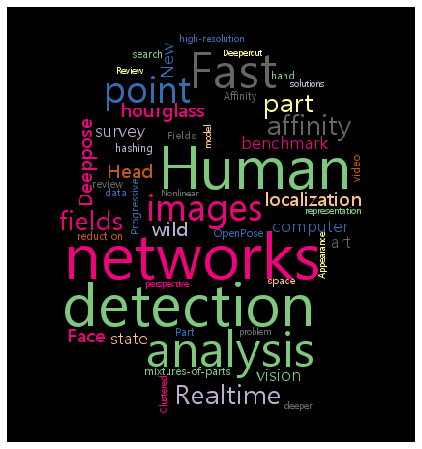

In [27]:
cloud_img = plt.imread('ai2.jpg') 
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600,
                     mask=cloud_img)

print(dict(words))
cloud = wordcloud.generate_from_frequencies(dict(words))
plt.figure(figsize=(10, 8))
plt.axis('off')   
plt.imshow(cloud)
plt.show()

### ▶ 결과  [pose estimation 검색 결과 전반적인 keyword 값]
#### : Human, detection, networks, fast, analysis, localization face, point, hourglass
##### 가장 인용이 많이 된 논문들의 keyword <DeepPose, Realtime, affinity, face detection, localization, networks> 와 비슷하지만 살짝 다른 양상

- 인용이 많이 된 논문들의 keyword 들은 전반적으로 최신 알고리즘이나 조금 더 trendy 한 keyword 를 가지고 있고, 전체 keyword 출현 횟수로 분석한 keyword 는 비교적 전문적인 용어보다 일반적인 단어들이 더 많이 나왔다.
- 최신의 trendy 한 keyword 를 분석하기 위해서는 전체적인 키워드 분석보다는 인용이 많이 된 논문들을 선별해 keyword 분석을 하는 것이 더 효과적이다.